In [1]:
DATASET_PATH = 'dataset/'

In [80]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import pandas as pd
import numpy as np
from scipy.io import wavfile
import librosa
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 12]
plt.rc('axes', labelsize=16)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels


# set seed for reproducibility
np.random.seed(0)

In [3]:
# print the content of 
contents = os.listdir(DATASET_PATH)
for c in contents:
    print(c)

cv-invalid
cv-invalid.csv
cv-other-dev
cv-other-dev.csv
cv-other-test
cv-other-test.csv
cv-other-train
cv-other-train.csv
cv-valid-dev
cv-valid-dev.csv
cv-valid-test
cv-valid-test.csv
cv-valid-train
cv-valid-train.csv
LICENSE.txt
README.txt


In [50]:
# import datasets
df_train = pd.read_csv(DATASET_PATH + 'cv-valid-train.csv')
df_test = pd.read_csv(DATASET_PATH + 'cv-valid-test.csv')
df_train.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [5]:
df_train.describe()

,up_votes,down_votes,duration
count,195776.000000,195776.000000,0.0
mean,2.527281,0.150866,NaN
std,7.084358,1.593051,NaN
min,1.000000,0.000000,NaN
25%,1.000000,0.000000,NaN
50%,2.000000,0.000000,NaN
75%,3.000000,0.000000,NaN
max,973.000000,528.000000,NaN


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [7]:
df_train.isnull().sum()

filename           0
text               0
up_votes           0
down_votes         0
age           122008
gender        121717
accent        131065
duration      195776
dtype: int64

In [8]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')

Train set shape: (195776, 8)
Test set shape: (3995, 8)


In [9]:
measurer = np.vectorize(len)
max_str_length = measurer(df_train.text.astype(str)).max(axis=0)
print('The maximum text length in the training set is of length ' + str(max_str_length))

The maximum text length in the training set is of length 191


In [10]:
df_train.age.unique()

array([nan, 'twenties', 'seventies', 'thirties', 'sixties', 'fifties',
       'fourties', 'teens', 'eighties'], dtype=object)

In [11]:
df_train.gender.unique()

array([nan, 'female', 'male', 'other'], dtype=object)

In [57]:
def savefig(name):
    plt.xlabel(name[0].upper() + name[1:], labelpad=14)
    plt.ylabel("Count of People", labelpad=14)
    plt.savefig(f'Images/{name}.png')

In [53]:
df_train.accent.value_counts()

us                30997
england           14938
indian             4490
australia          4287
canada             3901
scotland           1556
african            1173
newzealand         1153
ireland             944
philippines         326
wales               262
bermuda             196
malaysia            182
singapore           124
hongkong             99
southatlandtic       83
Name: accent, dtype: int64

In [54]:
df_train.age.value_counts()

twenties     23003
thirties     18303
fourties     11100
fifties       9466
teens         5441
sixties       4584
seventies     1632
eighties       239
Name: age, dtype: int64

In [55]:
df_train.gender.value_counts()

male      55029
female    18249
other       781
Name: gender, dtype: int64

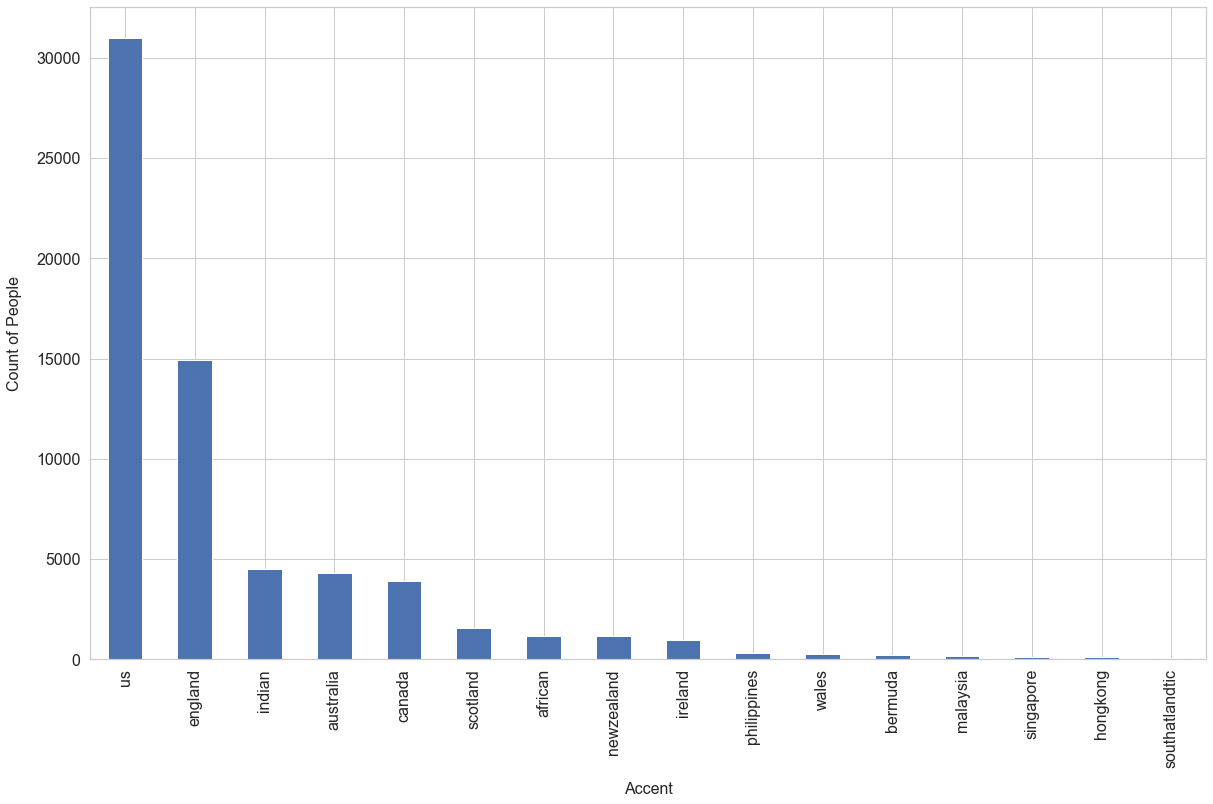

In [81]:
df_train.accent.value_counts().plot.bar()
savefig('accent')

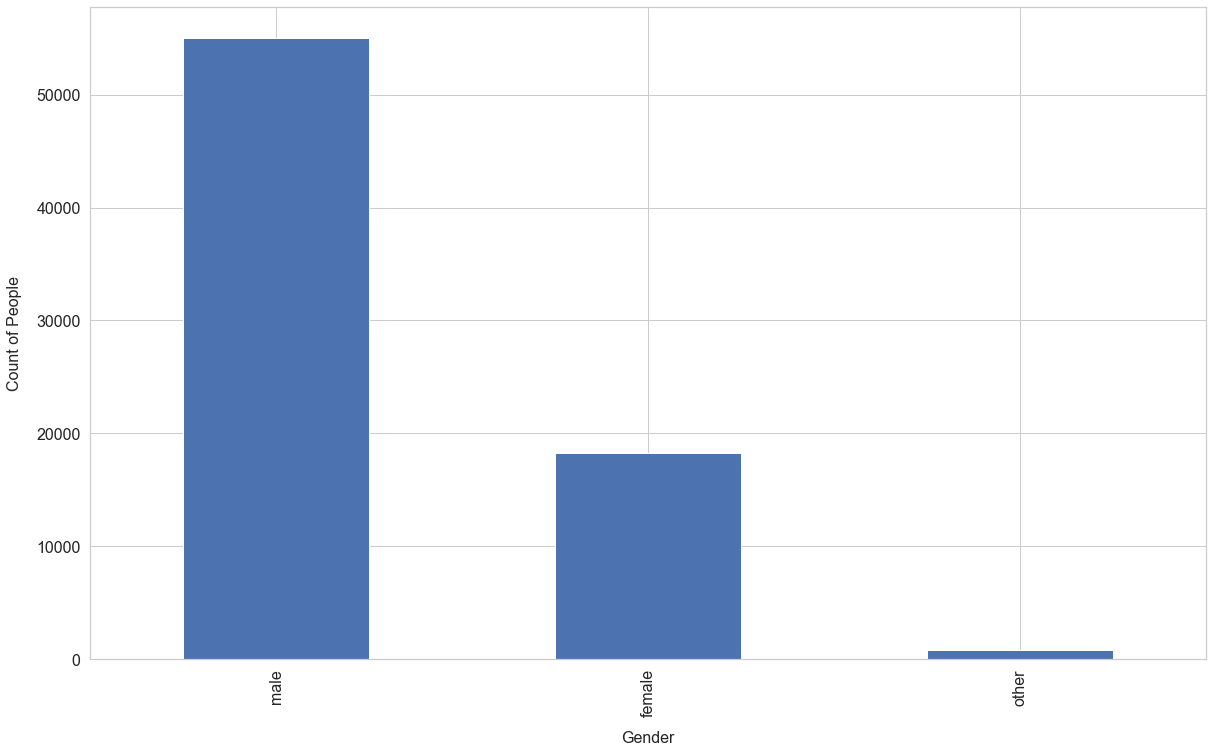

In [82]:
df_train.gender.value_counts().plot.bar()
savefig('gender')

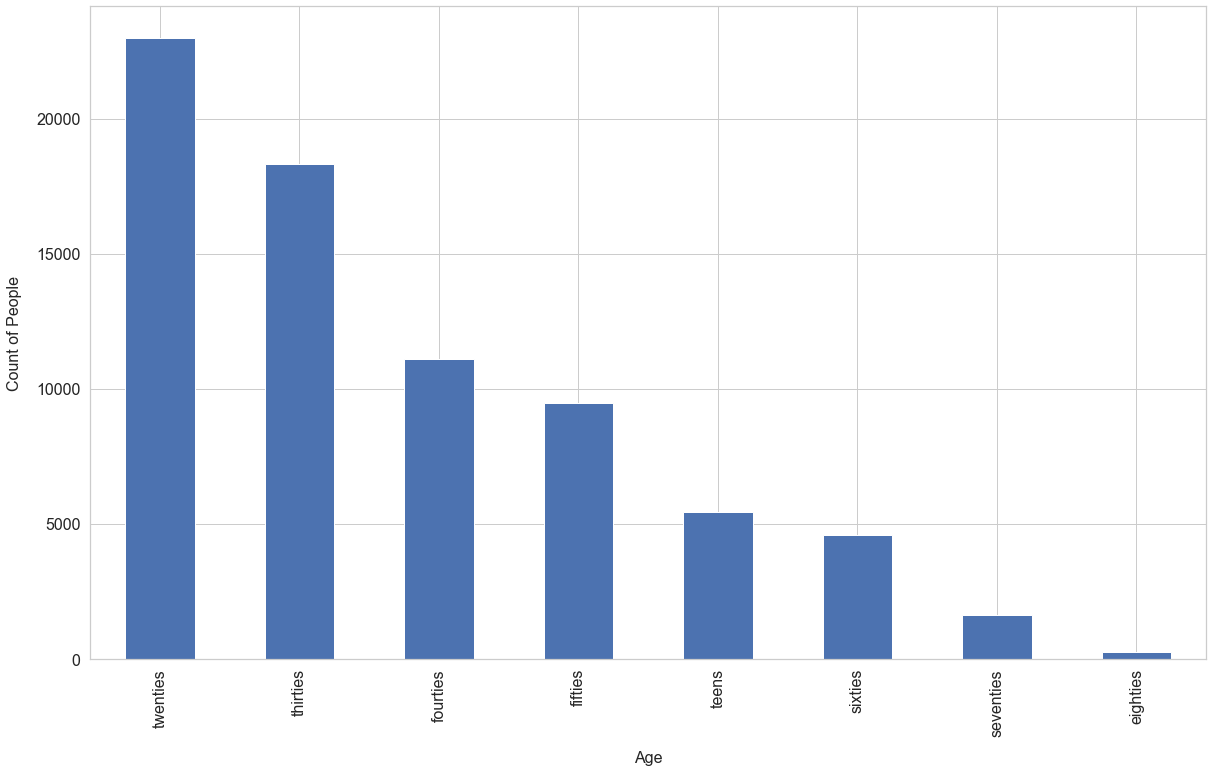

In [83]:
df_train.age.value_counts().plot.bar()
savefig('age')

In [32]:
# remove missing and other genders
df_train = df_train[(df_train.gender == 'male') | (df_train.gender == 'female')]
df_train

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,5.8
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,1.7
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,4.2
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,5.3
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,3.7
...,...,...,...,...,...,...,...,...
195766,cv-valid-train/sample-195766.mp3,but before i go i want to tell you a little story,1,0,fourties,male,england,NaN
195767,cv-valid-train/sample-195767.mp3,down below in the darkness were hundreds of pe...,3,0,thirties,female,us,NaN
195770,cv-valid-train/sample-195770.mp3,he heard a muffled grating sound and saw the b...,4,0,twenties,male,england,NaN
195771,cv-valid-train/sample-195771.mp3,the englishman said nothing,1,0,thirties,male,england,NaN


In [33]:
df_train.gender.value_counts()

male      55029
female    18249
Name: gender, dtype: int64

In [38]:
df_train = df_train.reset_index()

In [41]:
for i in range(df_train.shape[0]):
    df_train.at[i, 'duration'] = librosa.get_duration(filename=DATASET_PATH + 'cv-valid-train/' + df_train.filename[i])

In [ ]:
df_train.to_pickle(DATASET_PATH + 'cv-valid-train_filtered.pkl')

In [51]:
df_filtered = pd.read_pickle(DATASET_PATH + 'cv-valid-train_filtered.pkl')

In [52]:
df_filtered.describe()

,index,up_votes,down_votes,duration
count,73278.000000,73278.000000,73278.000000,73278.000000
mean,98021.164647,2.329089,0.101313,4.021231
std,56512.975179,2.930040,0.459532,2.632526
min,5.000000,1.000000,0.000000,0.900000
25%,48972.250000,1.000000,0.000000,2.800000
50%,98084.000000,2.000000,0.000000,3.700000
75%,146875.250000,3.000000,0.000000,4.900000
max,195774.000000,280.000000,36.000000,393.100000


In [110]:
df_filtered[df_filtered.duration > 10].duration.count()

315

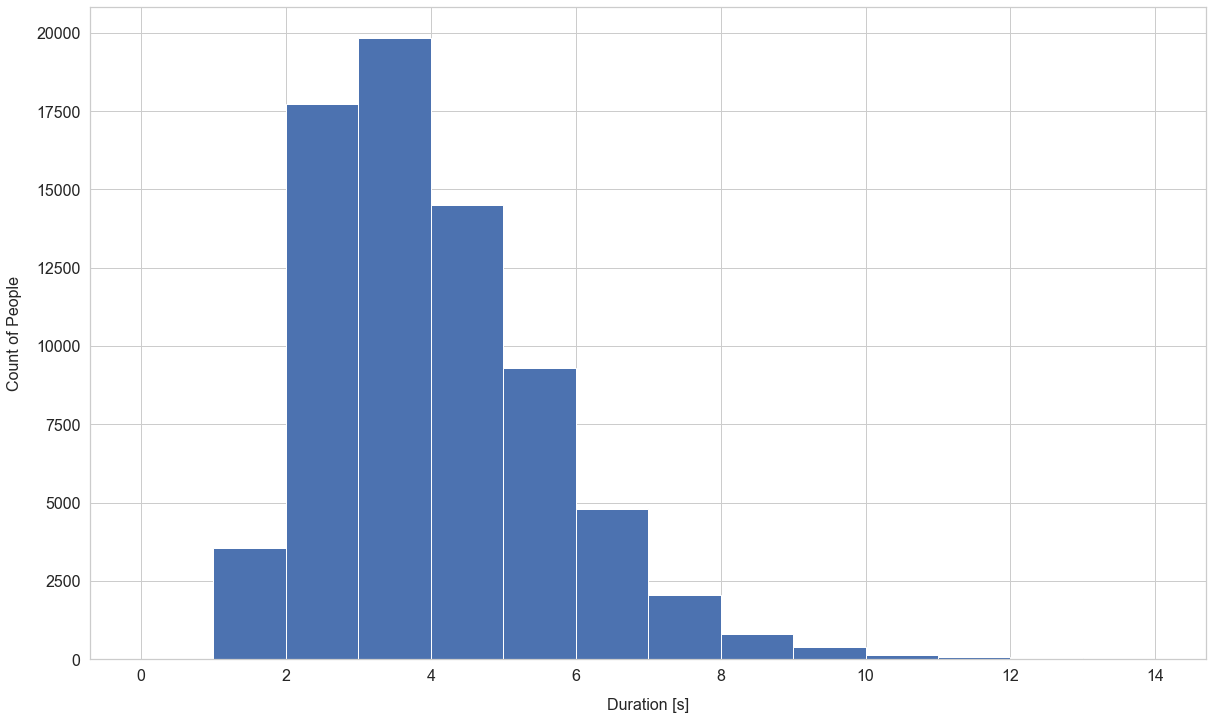

In [104]:
df_filtered.duration.hist(bins=range(15))
savefig('duration [s]')

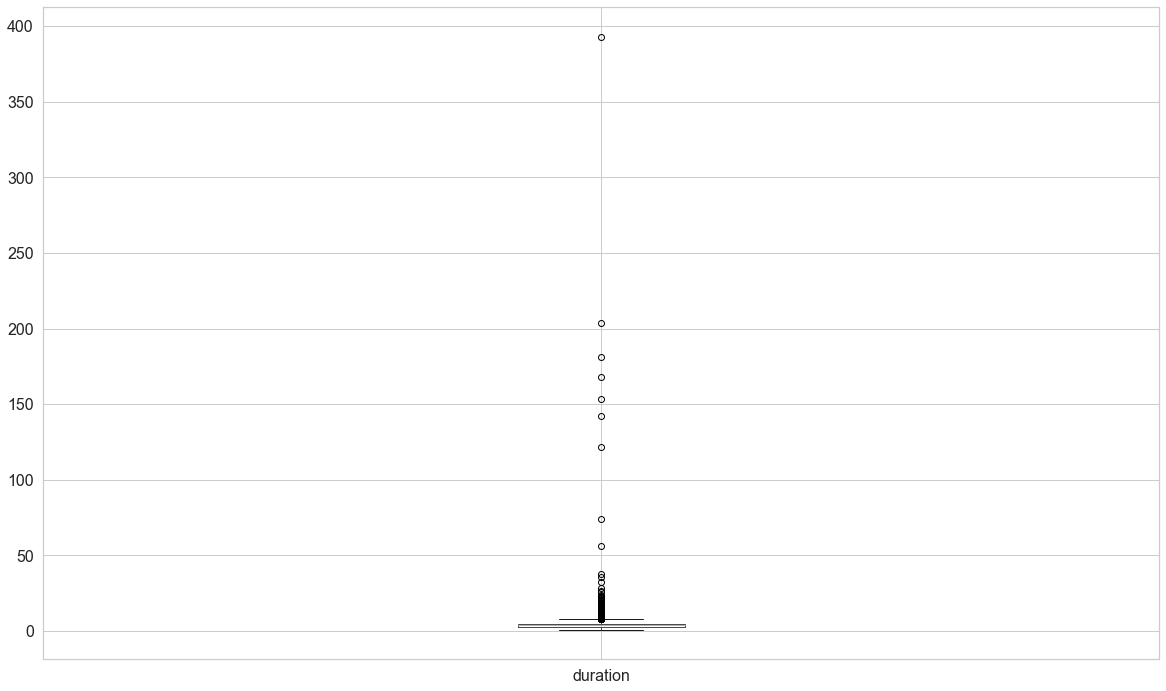

In [111]:
df_filtered.boxplot(column='duration')

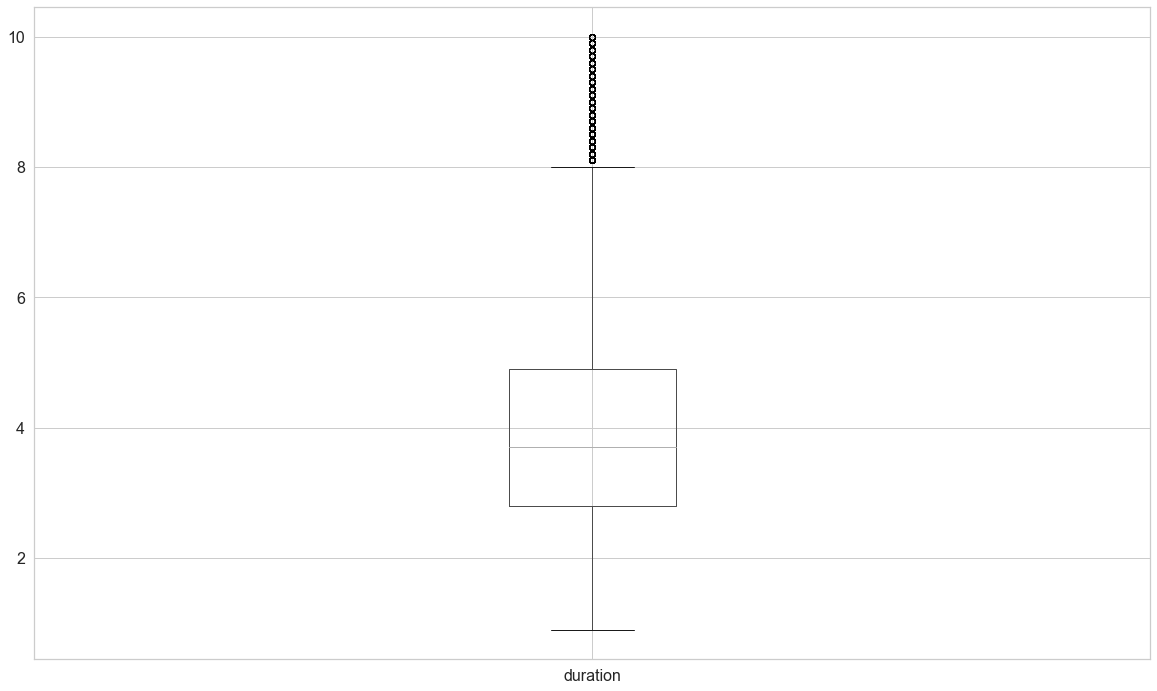

In [115]:
df_filtered[df_filtered.duration <= 10].boxplot(column='duration')
